# Упражнение 1.2

Для проведения исследований будем использовать библиотеку thinkdsp.

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Давайте загрузим аудиофайл в формате .wav в виде звуковой волны для дальнейших исследований. Учтём, что его длина составляет 12 секунд.

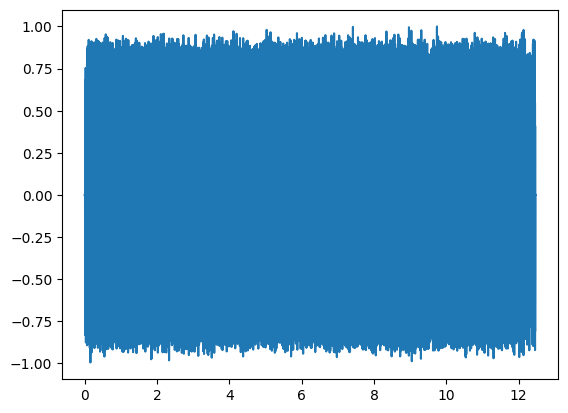

In [ ]:
from thinkdsp import read_wave
from IPython.display import Audio
wave = read_wave('lab1_sound.wav')
audio = Audio(data=wave.ys, rate=wave.framerate)
wave.plot()
audio

Давайте выберем отрезок аудио образца длительностью в полсекунды, начиная с двух секунд.

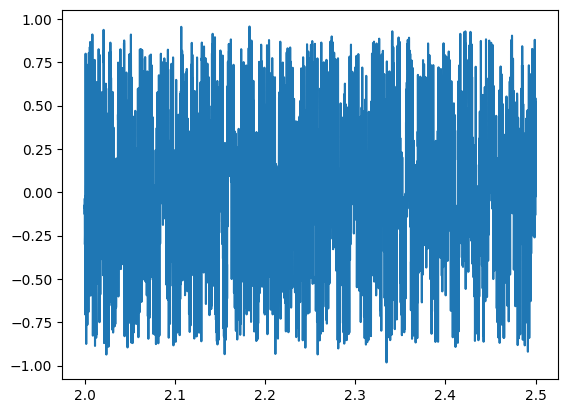

In [ ]:
segment = wave.segment(start = 2, duration= 0.5)
audio1 = Audio(data=segment.ys, rate=segment.framerate)
segment.plot()
audio1

Затем мы получим спектральное представление выбранного отрывка.

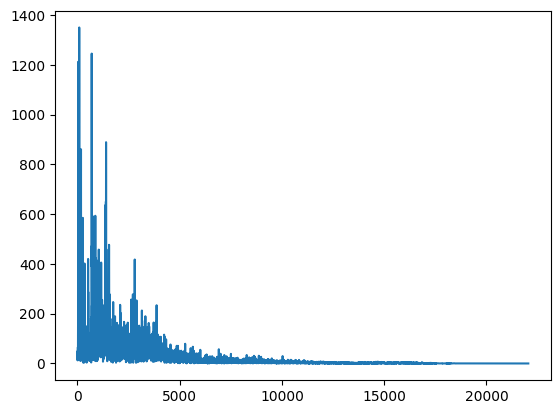

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot()

В данном сегменте преобладают низкие частоты. Мы ограничим анализируемую частоту до 1000 Гц, чтобы выяснить, какие частоты являются наиболее значимыми в этом фрагменте.

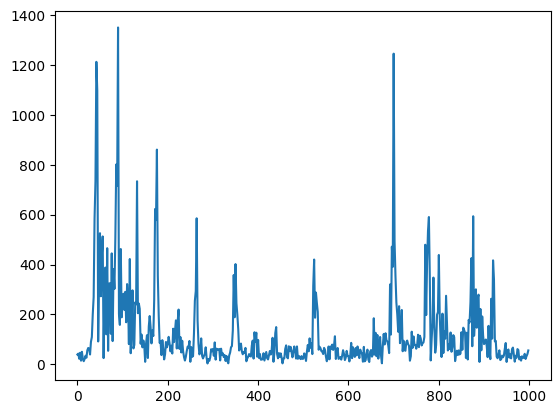

In [ ]:
spectrum.plot(high=1000)

Наибольшее значение обнаружено при 90 Гц. Это указывает на присутствие постоянной компоненты в сигнале. Вот пять наиболее высоких пиковых частот:

In [ ]:
spectrum.peaks()[:5]

[(1350.8660588218709, 90.0),
 (1245.8518137445617, 700.0),
 (1213.0733716264642, 42.0),
 (1097.9007861054197, 44.0),
 (889.6290376546448, 1402.0)]

После этого мы исключим высокие частоты (более 4000 Гц) и прослушаем результат. Для этого применим фильтр нижних частот (low_pass):

In [ ]:
spectrum.low_pass(4000)
spectrum.make_wave().make_audio()

Звук приобрел более низкий тембр. Далее мы исключим низкие частоты (менее 1000 Гц) с помощью фильтра высоких частот (high_pass):

In [ ]:
spectrum.high_pass(1000)
spectrum.make_wave().make_audio()

Теперь звук приобрел более высокий тембр. Мы будем использовать фильтр полосы подавления (band_stop), чтобы исключить все частоты вне диапазона от 1500 до 2000 Гц:

In [ ]:
spectrum.band_stop(1500,2000)
spectrum.make_wave().make_audio()

# Упражнение 1.3

Давайте создадим объекты SinSignal и CosSignal, а затем сложим их вместе. В результате мы получим следующий сигнал:

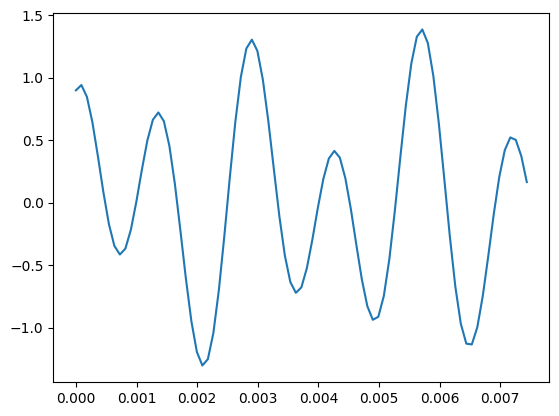

In [ ]:
from thinkdsp import CosSignal, SinSignal

sin_sig = SinSignal(freq=400, amp=0.5, offset=0)
cos_sig = CosSignal(freq=700, amp=0.9, offset=0)
sin_cos_sig = sin_sig + cos_sig
sin_cos_sig.plot()
wave2 = sin_cos_sig.make_wave()
audio2 = Audio(data=wave2.ys, rate=wave2.framerate)
audio2

Давайте вычислим спектр этого сигнала и выведем его на печать.

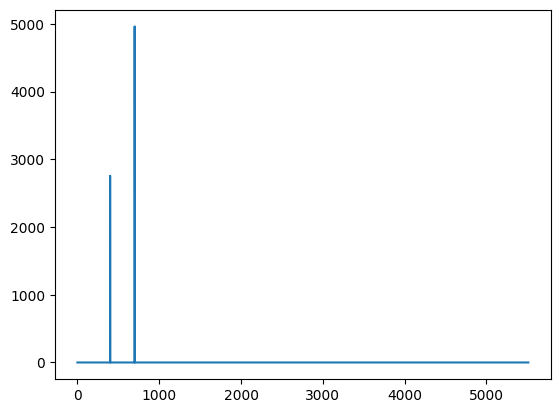

In [ ]:
spectrum2 = sin_cos_sig.make_wave().make_spectrum()
spectrum2.plot()

Если добавить сигнал, частота которого не является кратной 100, то мы услышим его как отдельный звук, выделяющийся из общего сигнала.

In [ ]:
sin_cos_sig += SinSignal(freq=650)
sin_cos_sig.make_wave().make_audio()

# Упражнение 1.4

Давайте создадим функцию "stretch", которая будет ускорять или замедлять аудиозапись в зависимости от коэффициента. В данном случае, изменяя массив временных меток "ts" для выборки и преобразования сигнала, умножая его на 0.5, мы уменьшаем длительность аудиозаписи, а путем увеличения частоты кадров (путем деления на 0.5 и умножения на 2) мы ускоряем воспроизведение.

In [ ]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Давайте проведем тестирование, подставив различные коэффициенты. При значении 0.5 аудиозапись уменьшится в два раза (аудиозапись будет длиться 6 секунд). Если продолжить использовать программу с этим коэффициентом, то длительность композиции будет постепенно уменьшаться.

In [ ]:
stretch(wave, 0.5)
wave.make_audio()

При коэффициенте 1.5 аудиозапись увеличилась в длительности до 9 секунд (прежде она длилась 12 секунд).

In [ ]:
stretch(wave, 1.5)
wave.make_audio()